In [11]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar

In [ ]:
#load and preprocess the data
df = pd.read_csv("../Datathon/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_73028/614486355.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby('region')['charges'].agg(['mean', 'count', 'std'])


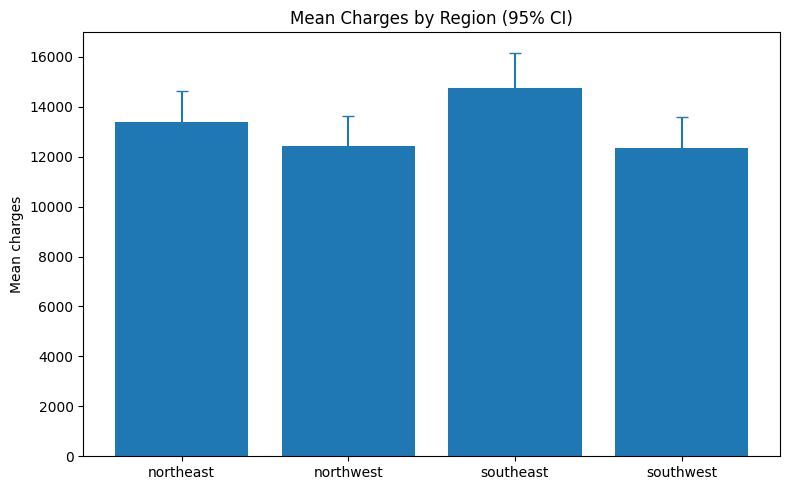

In [29]:
df['region'] = df['region'].astype('category')
df['log_charges'] = np.log1p(df['charges'])

agg = df.groupby('region')['charges'].agg(['mean', 'count', 'std'])
agg['sem'] = agg['std'] / np.sqrt(agg['count'])
agg['ci95'] = 1.96 * agg['sem']        # ~95% CI

regions = agg.index.astype(str).tolist()
y = agg['mean'].to_numpy()
yerr = agg['ci95'].to_numpy()

x = np.arange(len(regions))

plt.figure(figsize=(8,5))
plt.bar(x, y)
plt.errorbar(x, y, yerr=yerr, fmt='none', capsize=4)
plt.xticks(x, regions)
plt.ylabel("Mean charges")
plt.title("Mean Charges by Region (95% CI)")
plt.tight_layout()
plt.show()


/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_73028/3666973773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_log = df.groupby('region')['log_charges'].agg(['mean', 'count', 'std'])


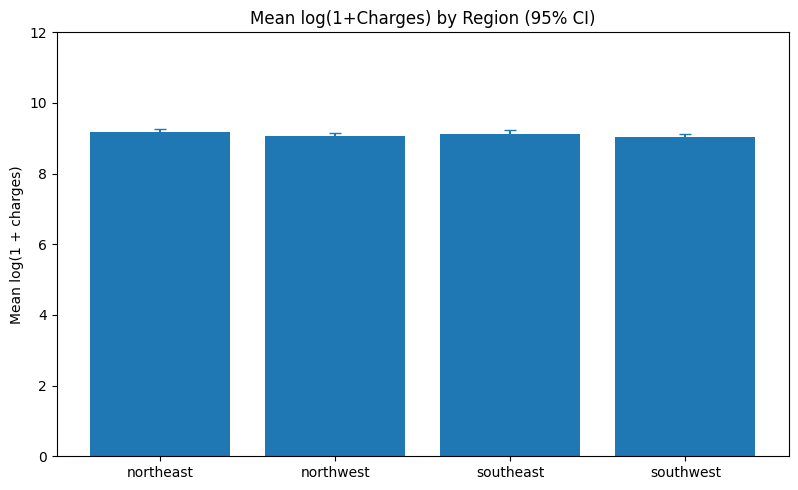

In [32]:
agg_log = df.groupby('region')['log_charges'].agg(['mean', 'count', 'std'])
agg_log['sem']  = agg_log['std'] / np.sqrt(agg_log['count'])
agg_log['ci95'] = 1.96 * agg_log['sem']

regions = agg_log.index.astype(str).tolist()
y = agg_log['mean'].to_numpy()
yerr = agg_log['ci95'].to_numpy()

x = np.arange(len(regions))

plt.figure(figsize=(8,5))
plt.bar(x, y)
plt.errorbar(x, y, yerr=yerr, fmt='none', capsize=4)
plt.xticks(x, regions)
plt.ylabel("Mean log(1 + charges)")
plt.title("Mean log(1+Charges) by Region (95% CI)")
plt.tight_layout()
plt.ylim(0, 12)     # charges in dollars
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_73028/248813.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female, male], labels=['Female', 'Male'], showfliers=True)  # set showfliers=False to hide outliers


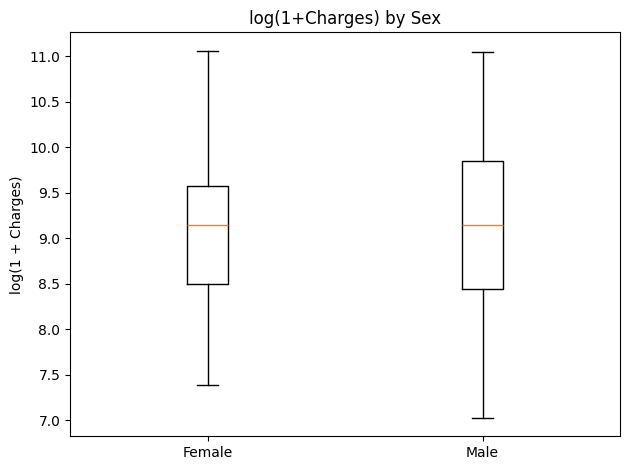

In [ ]:
# 1) Create a log-transformed column (handles zero safely)
#    log(1 + x) so there’s no issue if any charge == 0

# (Optional) sanity check for negatives
assert (df['charges'] >= 0).all(), "Found negative charges; log1p is undefined there."

# 2) Ensure categorical for clean grouping
df['sex'] = df['sex'].astype('category')

# 3) Side-by-side boxplot of log-transformed charges by sex
female = df.loc[df['sex'].str.lower() == 'female', 'log_charges'].values
male   = df.loc[df['sex'].str.lower() == 'male',   'log_charges'].values

plt.figure()
plt.boxplot([female, male], labels=['Female', 'Male'], showfliers=True)  # set showfliers=False to hide outliers
plt.ylabel('log(1 + Charges)')
plt.title('log(1+Charges) by Sex')
plt.tight_layout()
plt.show()